In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score


# Importing and Exporting the Dataset

In [5]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [4]:
type(data)

pandas.core.frame.DataFrame

In [11]:
data.shape

(299, 13)

#### Note: 
We have 299 lines and 13 columns

In [5]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
# We split our dataset into two categories to make it easier for analysis

categorical_variables = data[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continuous_variables = data[["age","creatinine_phosphokinase","ejection_fraction","platelets",\
                         "serum_creatinine","serum_sodium","time"]]

#### Note for Categorical data:
Anaemia: 0 means that the person does not have anaemia, if 1 it dose.

Diabetes: 0 means that the person does not have diabetes, if 1 it dose.

High_blood_pressure: 0 means that the person does not have High_blood_pressure, if 1 it dose.

Smoking: 0 means that the person does not smoke, if 1 it smokes.

Sex: 0 for female, 1 for male.

DEATH_EVENT: 0 means heart failure is not cause of the death, if 1 it is.

In [8]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
"""
describe() function helps us with the descriptive statistics.
"""

continuous_variables.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [11]:
data.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


#### Note

Since our result is DEATH_EVENT, we grouped our dataset by DEATH_EVENT and we can deduce 
that our dataset is unbalence because we have the total deaths(96) is less than
half of the total persons that did not die because of heart failure(203)

In [12]:
age = data[["age"]]
platelets = data[["platelets"]]

#### Visulizing the unbalance data with a scatter plot, the color will depend on DEATH_EVENT (0 or 1)

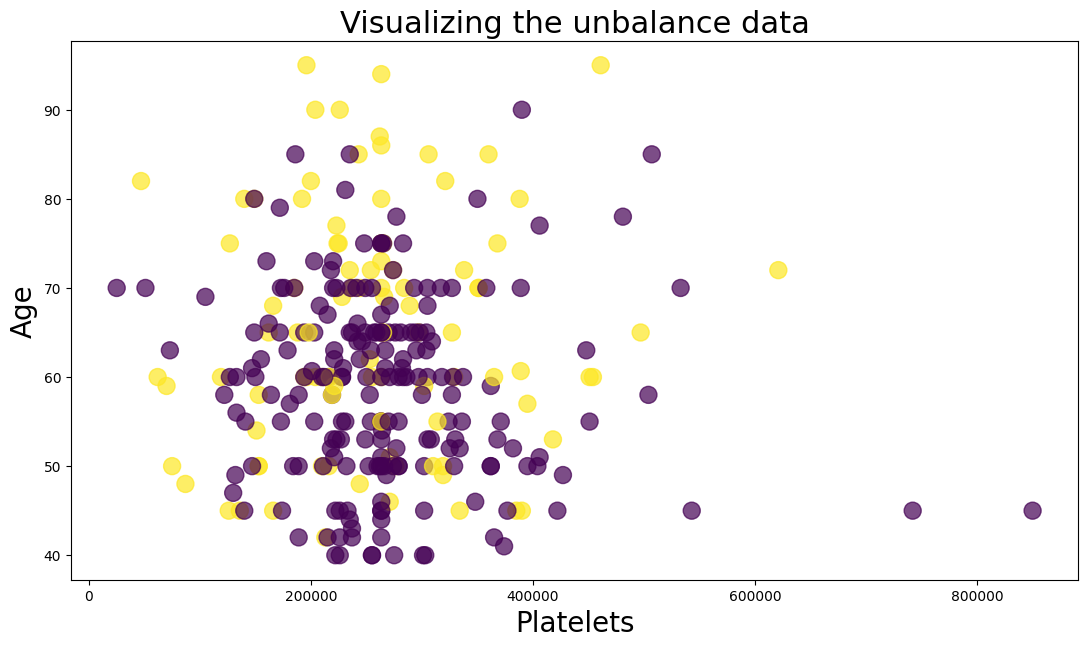

In [18]:
plt.figure(figsize = (13,7))
plt.scatter(platelets,age,c = data["DEATH_EVENT"],s = 150,alpha = 0.7)
plt.xlabel("Platelets",fontsize = 20)
plt.ylabel("Age",fontsize = 20)
plt.title("Visualizing the unbalance data",fontsize = 22)
plt.show()

#### Note:
We can see that we do have more circles in purple than in yellow

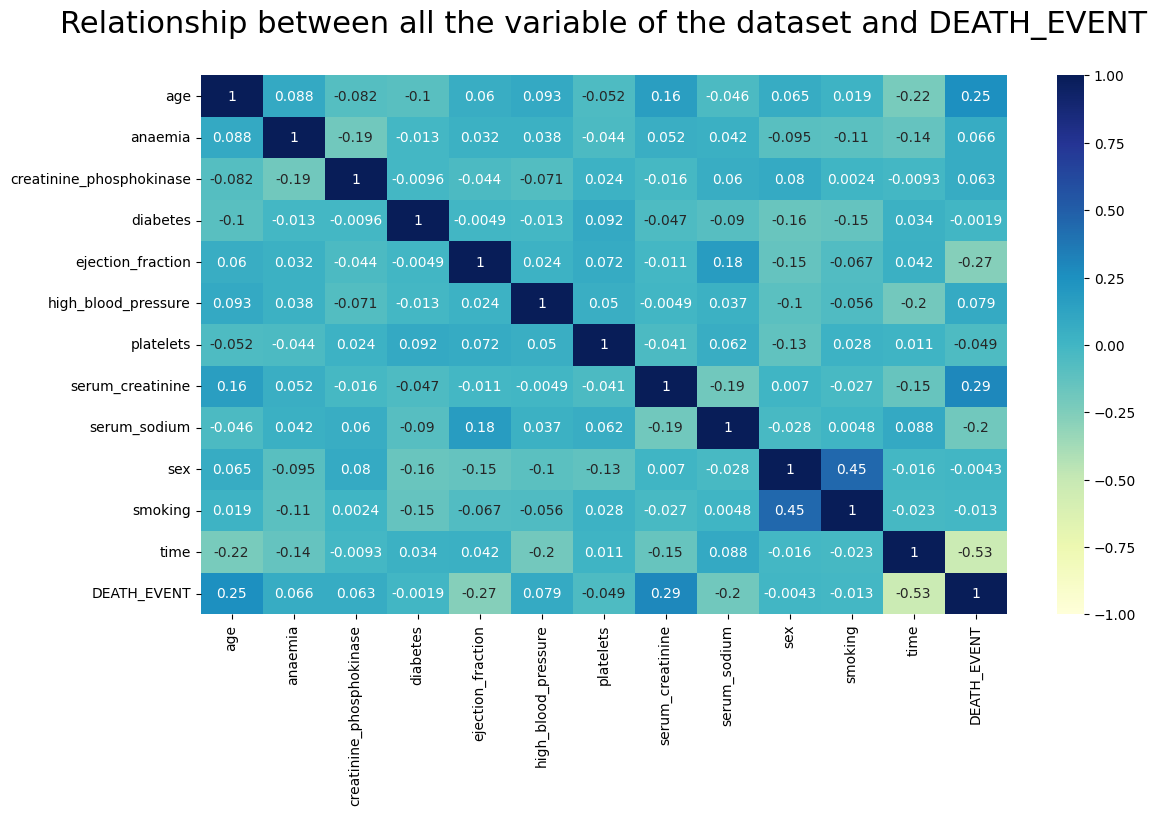

In [22]:
plt.figure(figsize = (13,7))
sns.heatmap(data.corr(), vmin = -1,vmax = 1,cmap = "YlGnBu",annot = True)
plt.title("Relationship between all the variable of the dataset and DEATH_EVENT\n",fontsize = 22)
plt.show()

#### Note:
We notice that there is a positive correlation between DEATH_EVENT and serum
cretinine and age.We have also a negative correlation between DEATH_EVENT and time,
ejection fraction and serum sodium a little bit


# 2.Data visualization:

In [27]:
categorical_data = data[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continuous_data = data[["age","creatinine_phosphokinase","ejection_fraction","platelets",\
                         "serum_creatinine","serum_sodium","time"]]

### Plotting the impact of categorical variables on DEATH_EVENT


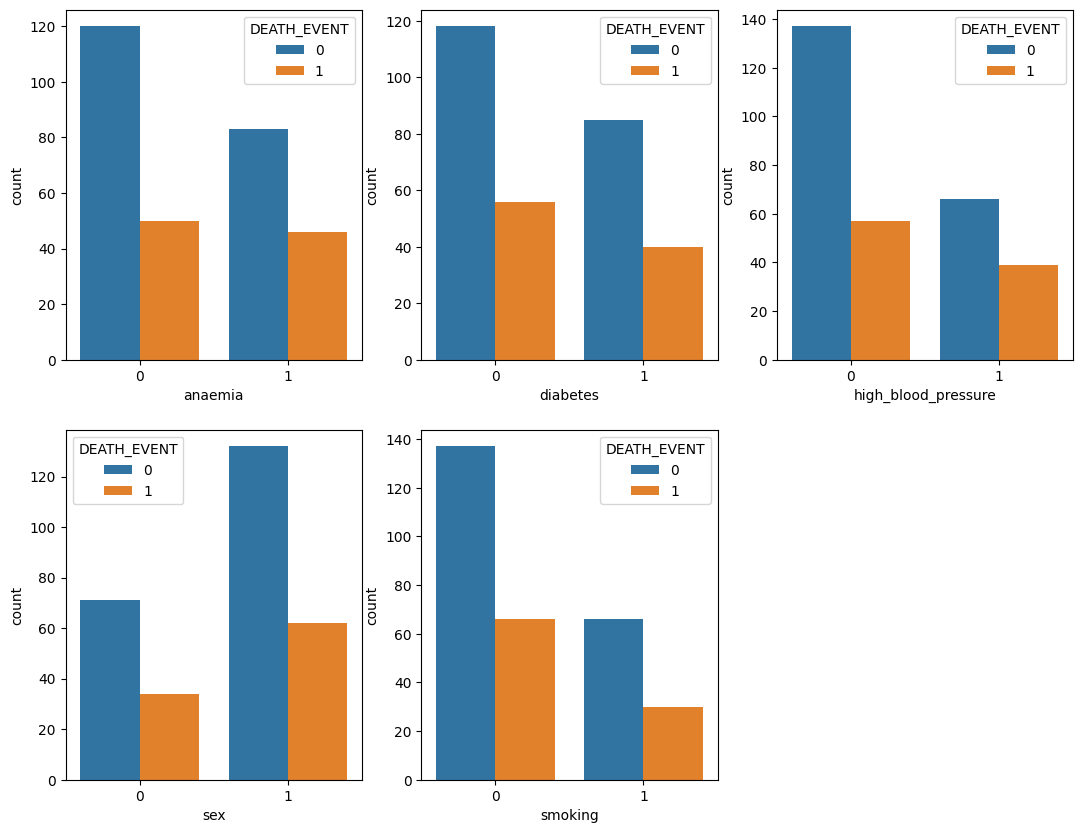

In [28]:
plt.figure(figsize = (13,10))
for i,cat in enumerate(categorical_data):
    plt.subplot(2,3,i+1)
    sns.countplot(data = data,x = cat,hue = "DEATH_EVENT")
plt.show()

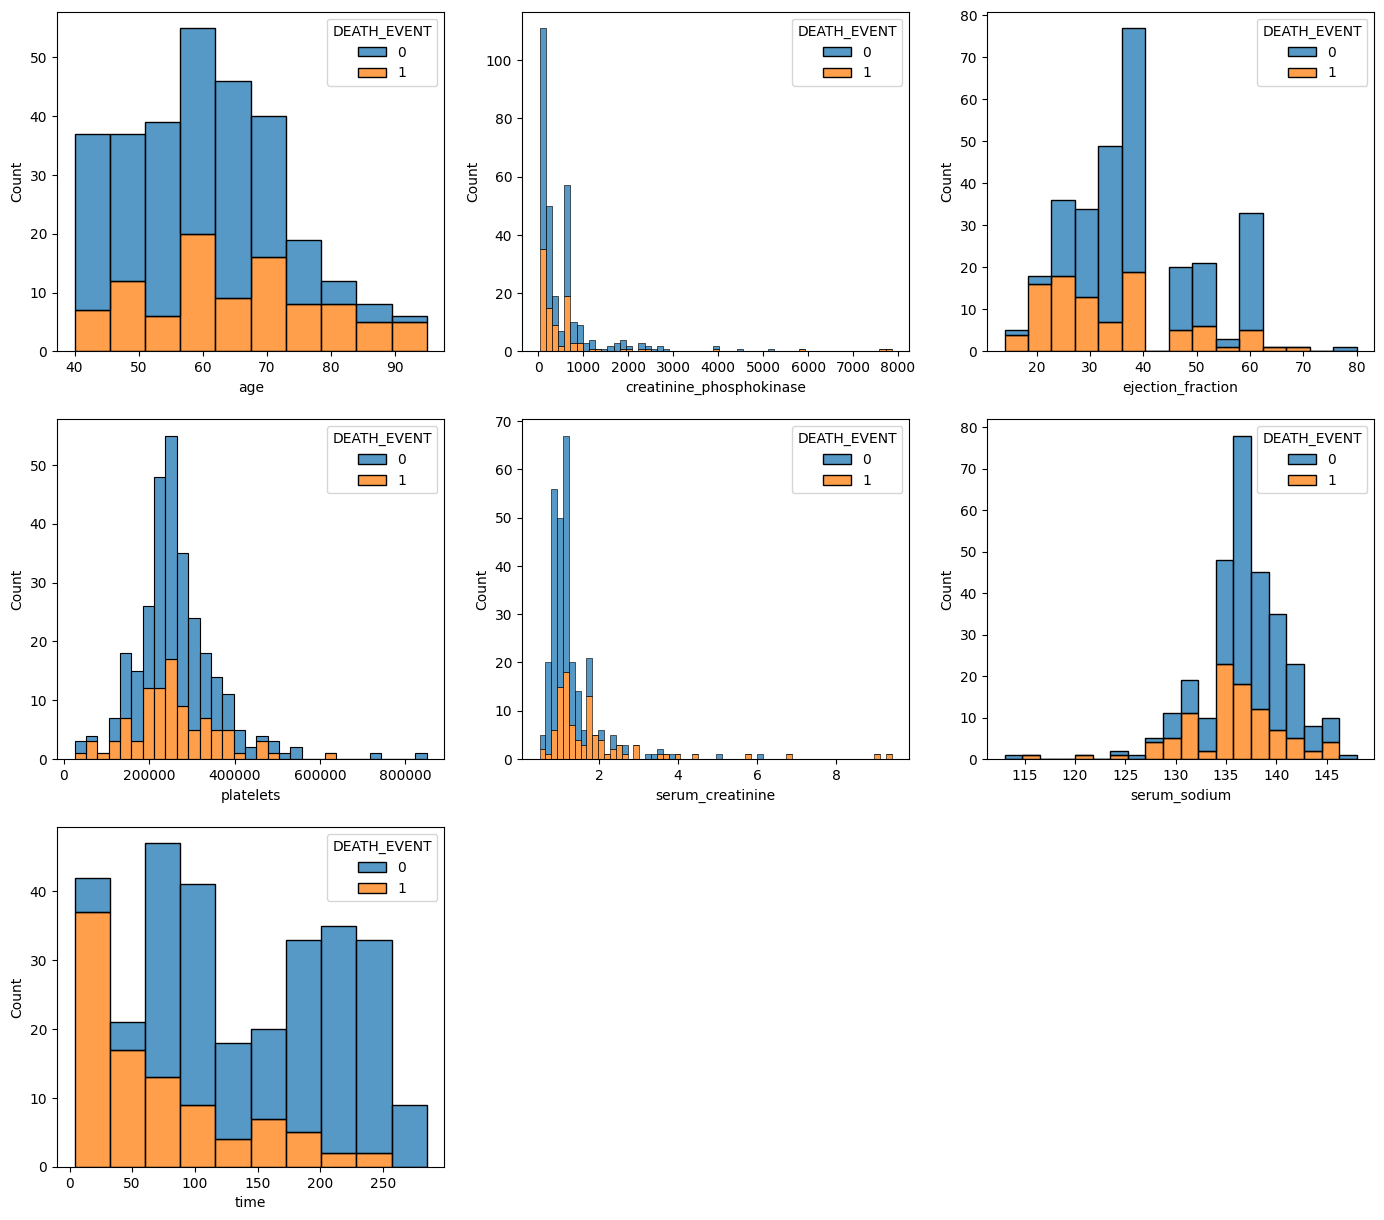

In [30]:
# Plotting the impact of continus variables on DEATH_EVENT

plt.figure(figsize = (17,15))
for j,con in enumerate(continuous_data):
    plt.subplot(3,3,j+1)
    sns.histplot(data = data,x = con,hue = "DEATH_EVENT",multiple = "stack")
plt.show()

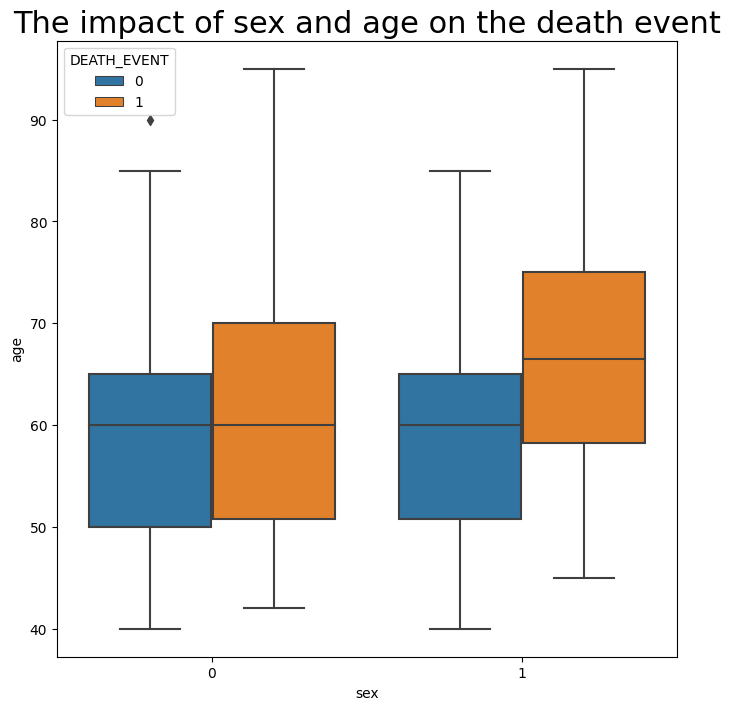

In [31]:
plt.figure(figsize = (8,8))
sns.boxplot(data = data,x = "sex",y = "age",hue = "DEATH_EVENT")
plt.title("The impact of sex and age on the death event",fontsize = 22)
plt.show()

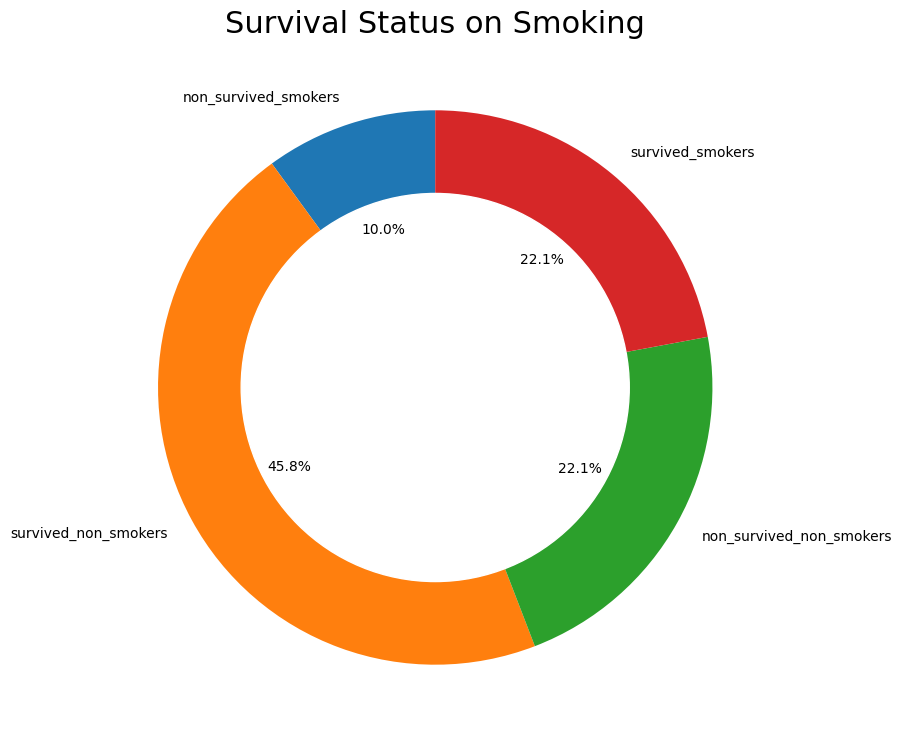

In [33]:
smokers = data[data["smoking"] == 1]
non_smokers = data[data["smoking"] == 0]

non_survived_smokers = smokers[smokers["DEATH_EVENT"] == 1]
survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"] == 0]
non_survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"] == 1]
survived_smokers =smokers[smokers["DEATH_EVENT"] == 0]

smoking_data = [len(non_survived_smokers),len(survived_non_smokers),len(non_survived_non_smokers),len(survived_smokers)]
smoking_labels = ["non_survived_smokers","survived_non_smokers","non_survived_non_smokers","survived_smokers"]

plt.figure(figsize = (9,9))
plt.pie(smoking_data,labels = smoking_labels,autopct = "%.1f%%",startangle = 90)
circle = plt.Circle((0,0),0.7,color ="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival Status on Smoking",fontsize = 22)
plt.show()


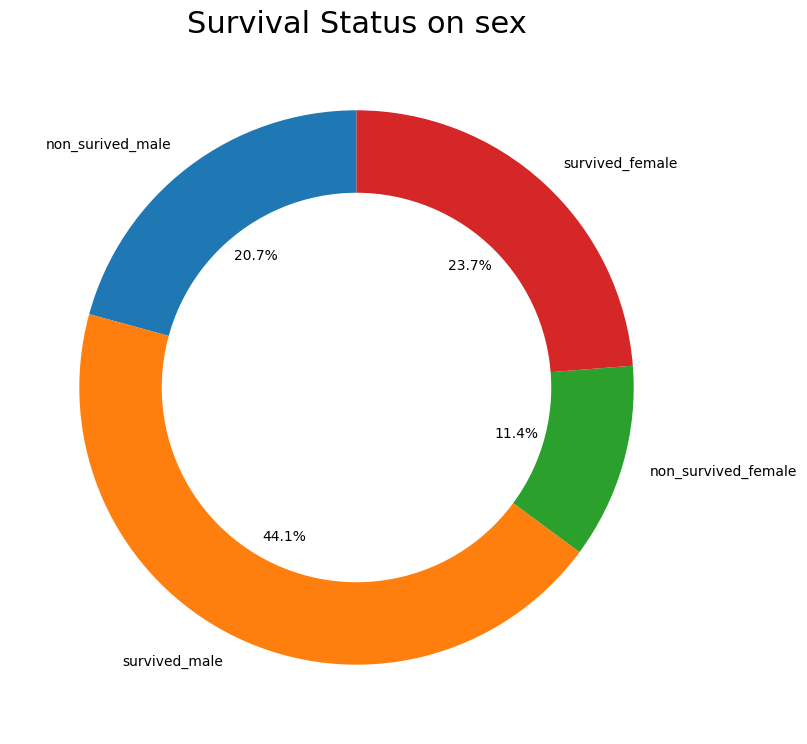

In [34]:
# Analyzing the survival status on sex

male = data[data["sex"] == 1]
female = data[data["sex"] == 0]

non_surived_male = male[male["DEATH_EVENT"] == 1]
survived_male = male[male["DEATH_EVENT"] == 0]
non_survived_female = female[female["DEATH_EVENT"] == 1]
survived_female = female[female["DEATH_EVENT"] == 0]

sex_data =[len(non_surived_male),len(survived_male),len(non_survived_female),len(survived_female)]
sex_labels = ["non_surived_male","survived_male","non_survived_female","survived_female"]

plt.figure(figsize = (9,9))
plt.pie(sex_data,labels = sex_labels,autopct = "%.1f%%",startangle = 90)
circle = plt.Circle((0,0),0.7,color ="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival Status on sex",fontsize = 22)
plt.show()

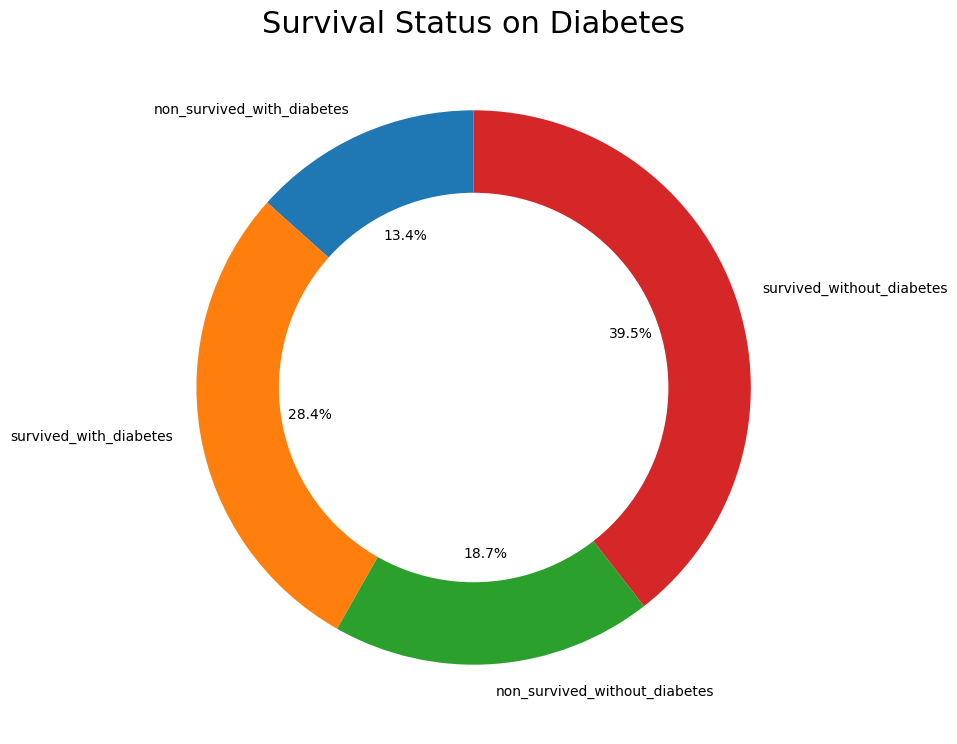

In [35]:
# Analyzing the survival status on diabetes
with_diabetes = data[data["diabetes"] == 1]
without_diabetes = data[data["diabetes"] == 0]

non_survived_with_diabetes = with_diabetes[with_diabetes["DEATH_EVENT"] == 1]
survived_with_diabetes = with_diabetes[with_diabetes["DEATH_EVENT"] == 0]
non_survived_without_diabetes = without_diabetes[without_diabetes["DEATH_EVENT"] == 1]
survived_without_diabetes = without_diabetes[without_diabetes["DEATH_EVENT"] == 0]

diabetes_data = [len(non_survived_with_diabetes),len(survived_with_diabetes),len(non_survived_without_diabetes),len(survived_without_diabetes)]
diabetes_labels = ["non_survived_with_diabetes","survived_with_diabetes","non_survived_without_diabetes","survived_without_diabetes"]

plt.figure(figsize = (9,9))
plt.pie(diabetes_data,labels = diabetes_labels,autopct = "%.1f%%",startangle = 90)
circle = plt.Circle((0,0),0.7,color ="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival Status on Diabetes",fontsize = 22)
plt.show()

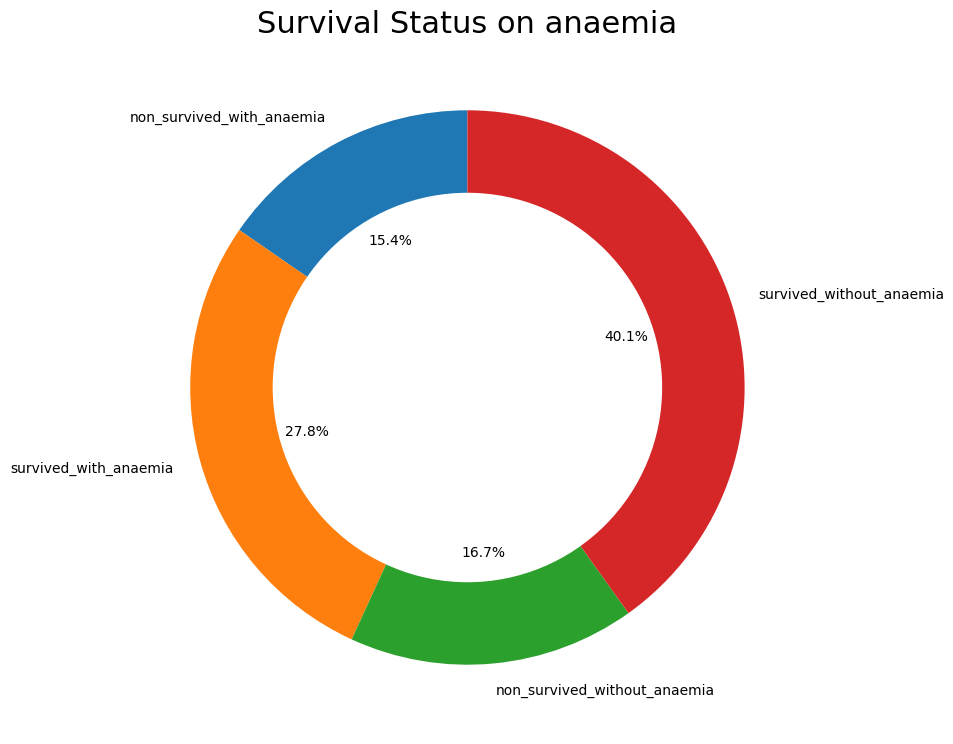

In [38]:
# Analyzing the survival status on anaemia

with_anaemia = data[data["anaemia"] == 1]
without_anaemia = data[data["anaemia"] == 0]

non_survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"] == 1]
survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"] == 0]
non_survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"] == 1]
survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"] == 0]

anaemia_data =[len(non_survived_with_anaemia),len(survived_with_anaemia),len(non_survived_without_anaemia),len(survived_without_anaemia)]
anaemia_labels =["non_survived_with_anaemia","survived_with_anaemia","non_survived_without_anaemia","survived_without_anaemia"]

plt.figure(figsize = (9,9))
plt.pie(anaemia_data,labels = anaemia_labels,autopct = "%.1f%%",startangle = 90)
circle = plt.Circle((0,0),0.7,color ="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival Status on anaemia",fontsize = 22)
plt.show()

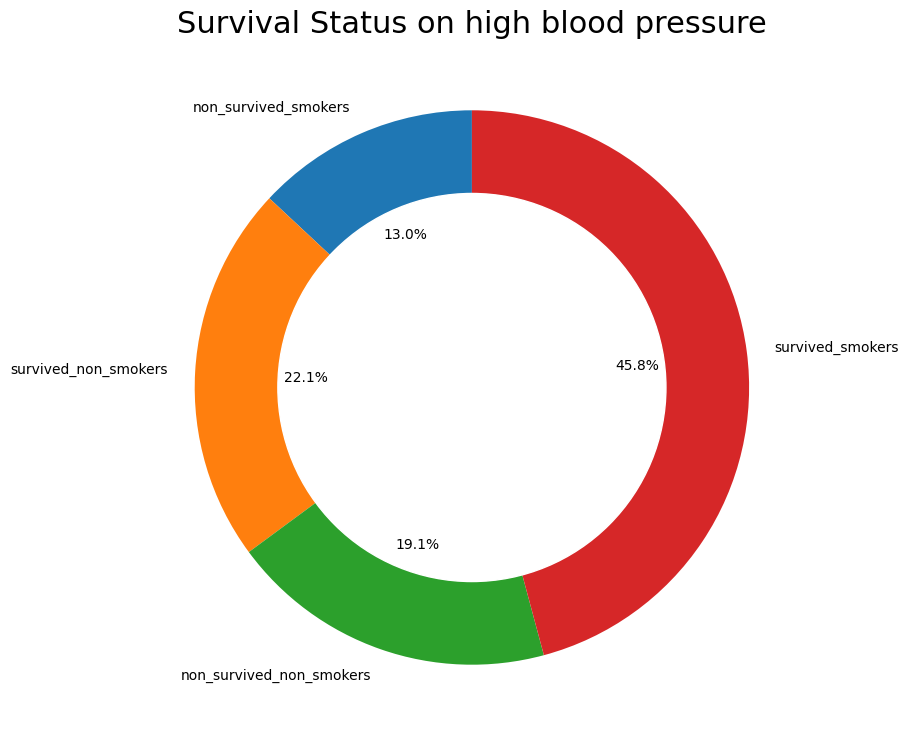

In [40]:
# Analyzing the survival status on high blood pressure

with_high_blood_pressure = data[data["high_blood_pressure"] == 1]
without_high_blood_pressure = data[data["high_blood_pressure"] == 0]

non_survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"] == 1]
survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"] == 0]
non_survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"] == 1]
survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"] == 0]

high_blood_pressure_data = [len(non_survived_with_high_blood_pressure),len(survived_with_high_blood_pressure),len(non_survived_without_high_blood_pressure),len(survived_without_high_blood_pressure)]
high_blood_pressure_labels = ["non_survived_with_high_blood_pressure", "survived_with_high_blood_pressure","non_survived_without_high_blood_pressure","survived_without_high_blood_pressure"]

plt.figure(figsize = (9,9))
plt.pie(high_blood_pressure_data,labels = smoking_labels,autopct = "%.1f%%",startangle = 90)
circle = plt.Circle((0,0),0.7,color ="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival Status on high blood pressure",fontsize = 22)
plt.show()

## 3.Data modeling & prediction using continuous data:

In [6]:
x = data[["age","creatinine_phosphokinase","ejection_fraction","platelets",\
                         "serum_creatinine","serum_sodium","time"]]
y = data[["DEATH_EVENT"]]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 2)

In [8]:
# Data scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
accuracy_list =[] 
# A list to save all the values from different models accuracy for comaraison using a bar chart

## 3.1 Logistic Regression 

In [40]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train.values.ravel())
lr_prediction = lr_model.predict(x_test_scaled)
lr_accuracy = (round(accuracy_score(lr_prediction,y_test),4) * 100) # percentage
accuracy_list.append(lr_accuracy)

## 3.2 Support Vector Machine

In [41]:
svc_model = SVC()
svc_model.fit(x_train_scaled,y_train.values.ravel())
svc_prediction = svc_model.predict(x_test_scaled)
svc_accuracy = (round(accuracy_score(svc_prediction,y_test),4) * 100)
accuracy_list.append(svc_accuracy)

## KNearestNeghbor:

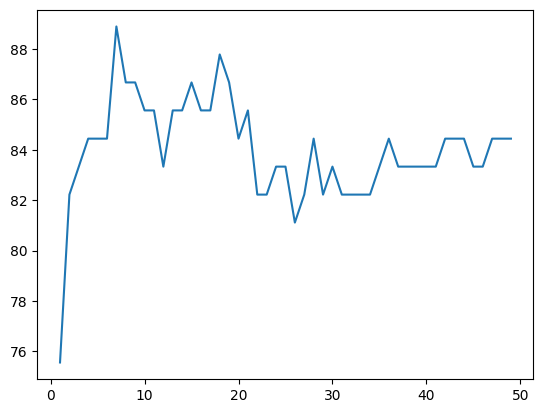

In [43]:
# We use this program to find the optimal value of R

knn_list = []
for k in range (1,50):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(x_train_scaled,y_train.values.ravel())
    knn_prediction = knn_model.predict(x_test_scaled)
    knn_accuracy = (round(accuracy_score(knn_prediction,y_test),4)*100)
    knn_list.append(knn_accuracy)
k = np.arange(1,50)
plt.plot(k,knn_list)

In [44]:
knn_model = KNeighborsClassifier(n_neighbors = 6)
knn_model.fit(x_train_scaled,y_train.values.ravel())
knn_prediction = knn_model.predict(x_test_scaled)
knn_acccuracy = (round(accuracy_score(knn_prediction,y_test),4)*100)
accuracy_list.append(knn_accuracy)


## 3.4 Decison Tree Classifier

In [66]:
dt_model = DecisionTreeClassifier(criterion = "entropy",max_depth = 2)
dt_model.fit(x_train_scaled, y_train)
dt_prediction = dt_model.predict(x_test_scaled)
dt_accuracy = (round(accuracy_score(dt_prediction,y_test),4)*100)
accuracy_list.append(dt_accuracy)

## 3.5 Naive Bayes

In [45]:
nb_model = GaussianNB()
nb_model.fit(x_train_scaled,y_train.values.ravel())
nb_prediction = nb_model.predict(x_test_scaled)
nb_accuracy = (round(accuracy_score(nb_prediction,y_test),4)*100)
accuracy_list.append(nb_accuracy)

## 3.6 Random Forest Classifer

In [46]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled,y_train.values.ravel())
rf_prediction = rf_model.predict(x_test_scaled)
rf_accuracy = (round(accuracy_score(rf_prediction,y_test),4)*100)
accuracy_list.append(rf_accuracy)

In [48]:
accuracy_list

[87.78,
 87.78,
 87.78,
 87.78,
 87.78,
 87.78,
 87.78,
 87.78,
 87.78,
 87.78,
 87.78,
 87.78,
 87.78,
 87.78,
 87.78,
 87.78,
 87.78,
 86.67,
 84.44,
 82.22,
 87.78]

In [49]:
models = ["Logistic Regression","SVC","KNearestNeighbors","Decision Tree","Naive Bayes","Random Forest"]


In [57]:
plt.figure(figsize = (17,6))
ax = sns.barplot(x = models,y = accuracy_list)
plt.xlabel("Classifiers",fontsize = 15)
plt.ylabel("Accuracy (%)", fontsize =15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x= p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %",(x + width/2 , y + height*1.01),ha = "center")
plt.show()

KeyError: 'Logistic Regression'

<Figure size 1700x600 with 0 Axes>